## 課程目標
    
利用神經網路的加法減法數學式來說明梯度下降

## 範例重點
    
透過網路參數(w, b)的更新可以更容易理解梯度下降的求值過程

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## ydata = b + w * xdata

在微積分裡面，對多元函數的參數求 ∂ 偏導數，把求得各個參數的偏導數以向量的形式寫出來，就是梯度。比如函數 f(x)，對 x 求偏導數，求得的梯度向量就是 ∂f/∂x，簡稱 grad f(x) 或者 ▽f(x)。

In [2]:
# 設定資料
x = np.array([338., 333., 328., 207., 226., 25., 179.,  60., 208.,  606.])
y = np.array([640., 633., 619., 393., 428., 27., 193.,  66., 226., 1591.])

In [3]:
# 設定神經網絡參數(bias & weight)
mesh_number = 100
upper_w, lower_w, init_w = -5, 5, -4
upper_b, lower_b, init_b = -100, -200, -150
w = np.arange(lower_w, upper_w, (upper_w - lower_w) / mesh_number)
b = np.arange(lower_b, upper_b, (upper_b - lower_b) / mesh_number)

In [4]:
# 建立神經網絡參數的網格資料 z: (b, w) -> mse，網格資料行列數必須相等。
def make_bias_weight_mesh(x, y, b, w):
    b_len, w_len, data_len = len(b), len(w), len(x)
    (b, w), z = np.meshgrid(b, w), np.zeros((b_len, w_len,))
    for i in range(b_len):
        for j in range(w_len):
            for k in range(data_len):
                z[i][j] += np.sum((y[k] - b[i][j] - w[i][j] * x[k]) ** 2)
            z[i][j] /= data_len
    return z

# 以梯度下降法調整神經網絡參數：
# Loss = sum((y - b - wx) ^ 2)
# Gradient B = ∂L/∂b = sum(2 * (y - b - wx) * (-1))
# Gradient W = ∂L/∂w = sum(2 * (y - b - wx) * (-x))
def gradient_descent_iterator(x, y, init_b, init_w, max_iters=10000, tolerance=0.000001, learning_rate=0.01):
    prev_b, prev_w, iters = init_b, init_w, {}
    for i in range(max_iters):
        iters[i] = np.array([prev_b, prev_w])
        next_b = prev_b - learning_rate * np.sum(-2.0 * (y - prev_b - prev_w * x))
        next_w = prev_w - learning_rate * np.sum(-2.0 * (y - prev_b - prev_w * x) * x)
        if abs(prev_b - next_b) > tolerance and abs(prev_w - next_w) > tolerance:
            prev_b, prev_w = next_b, next_w
            continue
        break
    return np.array(list(iters.items()))

# 等高線圖繪製梯度下降的過程
def gradient_descent_plot(b, w, z, init_b, init_w, hist_b, hist_w):
    plt.figure(figsize=(12, 7,))
    plt.contourf(b, w, z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
    plt.plot([init_b], [init_w], 'x', ms=12, markeredgewidth=3, color='orange')
    plt.plot(hist_b, hist_w, 'o', ms=3, color='black')
    plt.xlim(-200, -100)
    plt.ylim(-5, 5)
    plt.xlabel(r'$b$', fontsize=16)
    plt.ylabel(r'$w$', fontsize=16)
    plt.title('Gradient Descent')
    plt.show()

In [5]:
z = make_bias_weight_mesh(x, y, b, w)
z

array([[ 471181.4       ,  472329.2       ,  473479.        , ...,
         591830.        ,  593171.8       ,  594515.6       ],
       [ 431925.128     ,  433022.728     ,  434122.328     , ...,
         547704.328     ,  548995.928     ,  550289.528     ],
       [ 394415.672     ,  395463.072     ,  396512.472     , ...,
         505325.472     ,  506566.872     ,  507810.272     ],
       ...,
       [4796498.31199995, 4792776.71199995, 4789057.11199996, ...,
        4444815.11199996, 4441287.51199996, 4437761.91199996],
       [4926683.19199996, 4922911.39199995, 4919141.59199996, ...,
        4570130.59199996, 4566552.79199996, 4562976.99199996],
       [5058614.88799995, 5054792.88799995, 5050972.88799995, ...,
        4697192.88799995, 4693564.88799995, 4689938.88799995]])

In [6]:
iters = gradient_descent_iterator(x, y, init_b, init_w, learning_rate=0.0000001) # 因為梯度 w 太大，學習率太大無法收斂。
iters

array([[0, array([-150,   -4])],
       [1, array([-149.9967288,   -2.8542624])],
       [2, array([-149.99403277,   -1.90866572])],
       [3, array([-149.99181143,   -1.12824873])],
       [4, array([-149.98998186,   -0.48415735])],
       [5, array([-1.49988476e+02,  4.74222015e-02])],
       [6, array([-149.98723627,    0.48614383])],
       [7, array([-149.98621714,    0.84822824])],
       [8, array([-149.98537977,    1.14706266])],
       [9, array([-149.98469243,    1.39369578])],
       [10, array([-149.98412889,    1.59724628])],
       [11, array([-149.98366754,    1.76523998])],
       [12, array([-149.98329053,    1.90388804])],
       [13, array([-149.98298311,    2.01831664])],
       [14, array([-149.98273314,    2.11275652])],
       [15, array([-149.98253058,    2.19069936])],
       [16, array([-149.98236715,    2.25502692])],
       [17, array([-149.982236  ,    2.30811756])],
       [18, array([-149.98213151,    2.35193417])],
       [19, array([-149.98204902,    2

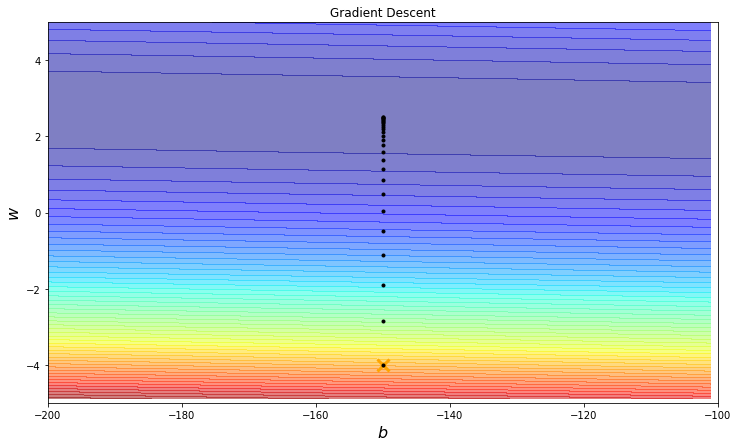

In [7]:
hist_b = np.array(list(iters[:, 1]))[:, 0]
hist_w = np.array(list(iters[:, 1]))[:, 1]
gradient_descent_plot(b, w, z, init_b, init_w, hist_b, hist_w)